<a href="https://colab.research.google.com/github/khadeejatabassum/EMAIL-SPAM-DETECTION-/blob/main/EMAIL_SPAM_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.9838565022421525
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



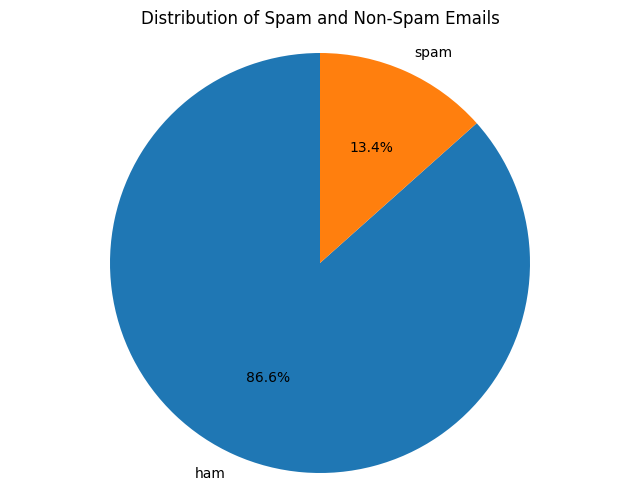

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Read the dataset into a Pandas DataFrame with the correct encoding
data = pd.read_csv('/content/spam.csv', encoding='latin1')

# Rename the columns to 'v1' and 'v2'
data = data.rename(columns={'v1': 'label', 'v2': 'EmailText'})

# Split the dataset into features (email text) and target variable (spam or not spam)
X = data['EmailText']
y = data['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert email text into numerical feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Train the Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vectors, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectors)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Create a pie chart of the email labels
label_counts = data['label'].value_counts()
labels = label_counts.index
sizes = label_counts.values

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Spam and Non-Spam Emails')
plt.show()
